## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

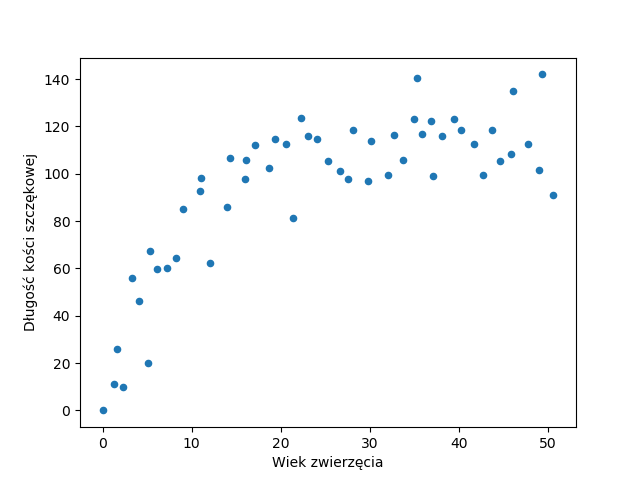

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List
import time
'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''
def transform_to_polynomial_feature(x: np.ndarray, n: int) -> np.ndarray:
    out = []
    out = [x**i for i in range(1, n+1)]
    return np.array(out)



### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

In [72]:
def initialize_coefficients(n: int = 2, alpha: float = None) -> Tuple[float, np.ndarray]:
    if alpha is None:
        alpha = 0.0001
    betas = np.random.rand(n)
    return alpha, betas

def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    return np.dot(X, betas)

def calculate_error(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    summand = calculate_regression_function(X, betas) - y
    error = np.sum(np.square(summand))/(2*len(y))
    return error

def calculate_gradient(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    diff = calculate_regression_function(X, betas) - y
    gradient = np.dot(X.T, diff)/len(y)
    return gradient

def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    gradient = calculate_gradient(X, y, betas)
    new_betas = betas - alpha * gradient
    return new_betas


In [73]:
def learn_and_fit(X: np.ndarray, y: np.ndarray, degree: int) -> Tuple[np.ndarray, np.ndarray]:
 
    epoch_number = 1000
    alpha, betas_coefficients = initialize_coefficients(degree)
    polynomial_X = np.array([transform_to_polynomial_feature(i, degree) for i in X])
    error = np.array(calculate_error(polynomial_X, y, betas_coefficients))
    betas = np.array(betas_coefficients)
    
    for i in range(epoch_number):
        betas_coefficients = update_regression_coefficients(polynomial_X, y, betas_coefficients, alpha)
        betas = np.vstack((betas, betas_coefficients))
        error = np.append(error, calculate_error(polynomial_X, y, betas_coefficients))
    return betas, error

C:\Users\domin\AppData\Local\Temp\ipykernel_25896\2778332386.py:12: RuntimeWarning: overflow encountered in square
  error = np.sum(np.square(summand))/(2*len(y))
C:\Users\domin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


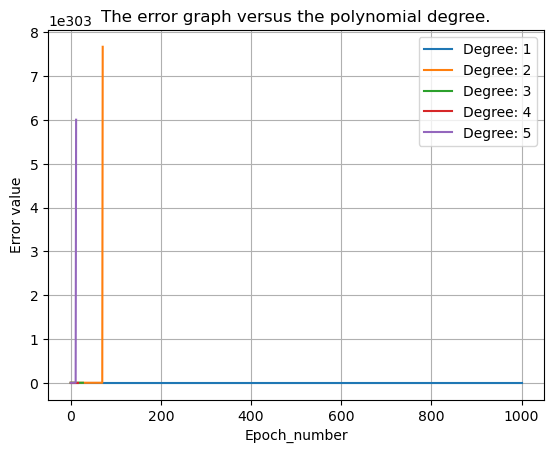

In [74]:
df = pd.read_csv('datasets/jaws.csv', sep=',')
X = df['age'].values
y = df['bone'].values
polynomial_degree = [1,2, 3,4, 5]
results = []

for degree in polynomial_degree:
  betas, error = learn_and_fit(X, y, degree)
  results.append((degree, error))

plt.figure()
for degree, error in results:
  plt.plot(error, label=f'Degree: {degree}')

plt.title("The error graph versus the polynomial degree.")
plt.xlabel('Epoch_number')
plt.ylabel('Error value')
plt.grid(True)
plt.legend()
plt.show()

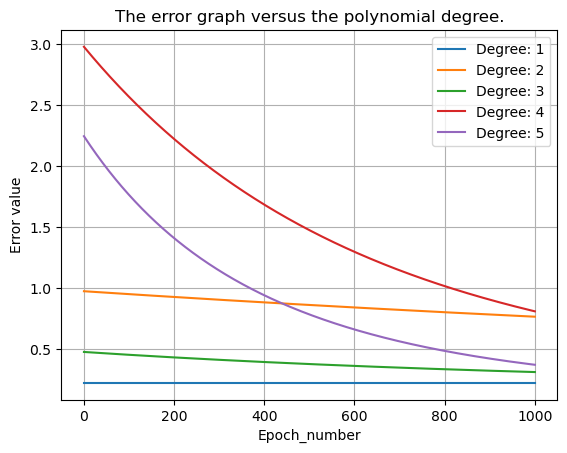

In [75]:
df = pd.read_csv('datasets/jaws.csv', sep=',')
X = df['age'].values
y = df['bone'].values
normalized_x = (X - np.mean(X)) / np.std(X)
normalized_y = (y - np.mean(y)) / np.std(y)
polynomial_degree = [1, 2, 3, 4, 5]
results = []

for degree in polynomial_degree:
  betas, error = learn_and_fit(normalized_x, normalized_y, degree)
  results.append((degree, error))

plt.figure()
for degree, error in results:
  plt.plot(error, label=f'Degree: {degree}')

plt.title("The error graph versus the polynomial degree.")
plt.xlabel('Epoch_number')
plt.ylabel('Error value')
plt.grid(True)
plt.legend()
plt.show()

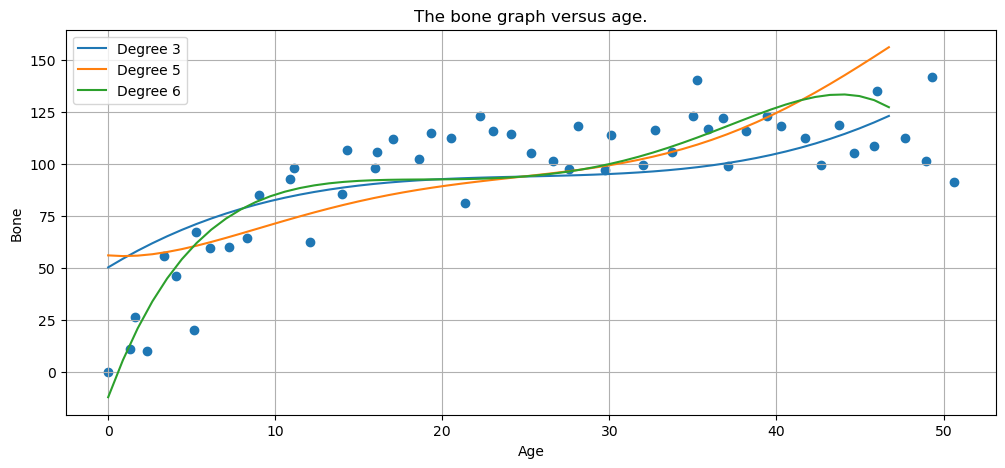

In [76]:
df = pd.read_csv('datasets/jaws.csv', sep=',')
X = df['age'].values
y = df['bone'].values
normalized_X = (X - np.mean(X)) / np.std(X)
normalized_y = (y - np.mean(y)) / np.std(y)
polynomial_degree =  [3, 5,6]

plt.figure(figsize=(12, 5))
for degree in polynomial_degree:
    betas, error = learn_and_fit(normalized_X, normalized_y, degree)
    
    normalized_X_range = np.linspace(normalized_x.min(), normalized_y.max(), len(normalized_X))
    
    polynomial_X_range = np.array([transform_to_polynomial_feature(x, degree) for x in normalized_X_range])
    
    normalized_prediction = calculate_regression_function(polynomial_X_range, betas[-1])
    
    X_range = normalized_X_range * np.std(X) + np.mean(X)
    prediction = normalized_prediction * np.std(y) + np.mean(y)
    
    plt.plot(X_range, prediction, label=f'Degree {degree}')

plt.scatter(X,y)
plt.title("The bone graph versus age.")
plt.xlabel('Age')
plt.ylabel('Bone')

plt.legend()

plt.grid(True)
plt.show()

### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

In [77]:
df = pd.read_csv('datasets/jaws.csv', sep=',')
X = df['age'].values
y = df['bone'].values
normalized_X = (X - np.mean(X)) / np.std(X)
normalized_y = (y - np.mean(y)) / np.std(y)
polynomial_degree = 8

def not_normalized_regression_time(X,y):
    start_time = time.time()
    betas, error = learn_and_fit(X, y, polynomial_degree)
    end_time = time.time()
    return end_time - start_time

def normalized_regression_time(normalized_X,normalized_y):
    start_time = time.time()
    betas, error = learn_and_fit(normalized_X, normalized_y, polynomial_degree)
    end_time = time.time()
    return end_time - start_time


print(f"Czas działania dla danych  znormalizowanych: {normalized_regression_time(X,y)} sekund")
print(f"Czas działania dla danych nie znormalizowanych: {not_normalized_regression_time(X,y)} sekund")


Czas działania dla danych  znormalizowanych: 0.03850364685058594 sekund
Czas działania dla danych nie znormalizowanych: 0.03700065612792969 sekund


C:\Users\domin\AppData\Local\Temp\ipykernel_25896\2778332386.py:12: RuntimeWarning: overflow encountered in square
  error = np.sum(np.square(summand))/(2*len(y))


Czas  wykonania obu funkcji jest podobny. Z tym że musimy wziąć pod uwagę to że dla danych nieznormalizowanych błąd przekroczył maksymalną dopuszczalną wartość.

### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

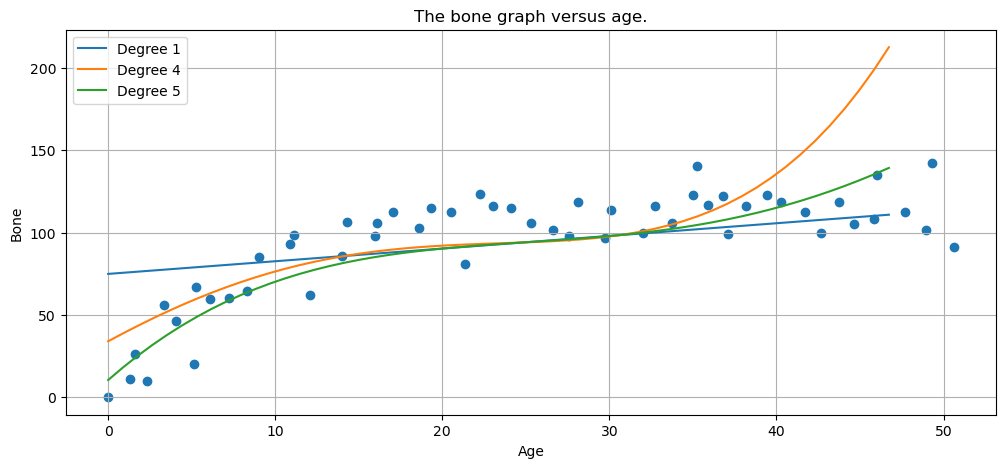

In [83]:
df = pd.read_csv('datasets/jaws.csv', sep=',')
X = df['age'].values
y = df['bone'].values
normalized_X = (X - np.mean(X)) / np.std(X)
normalized_y = (y - np.mean(y)) / np.std(y)
polynomial_degree = [1, 4, 5]

plt.figure(figsize=(12, 5))
for degree in polynomial_degree:
    betas, error = learn_and_fit(normalized_X, normalized_y, degree)
    
    normalized_X_range = np.linspace(normalized_x.min(), normalized_y.max(), len(normalized_X))
    
    polynomial_X_range = np.array([transform_to_polynomial_feature(x, degree) for x in normalized_X_range])
    
    normalized_prediction = calculate_regression_function(polynomial_X_range, betas[-1])
    
    X_range = normalized_X_range * np.std(X) + np.mean(X)
    prediction = normalized_prediction * np.std(y) + np.mean(y)
    
    plt.plot(X_range, prediction, label=f'Degree {degree}')

plt.scatter(X,y)
plt.title("The bone graph versus age.")
plt.xlabel('Age')
plt.ylabel('Bone')

plt.legend()

plt.grid(True)
plt.show()

Dla wielomianu stopnia pierwszego jest to funkcja liniowa - wiadomo. Lecz im wyższy stopień wielomianu tym funkcja lepiej dostosowuje się do danych

### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

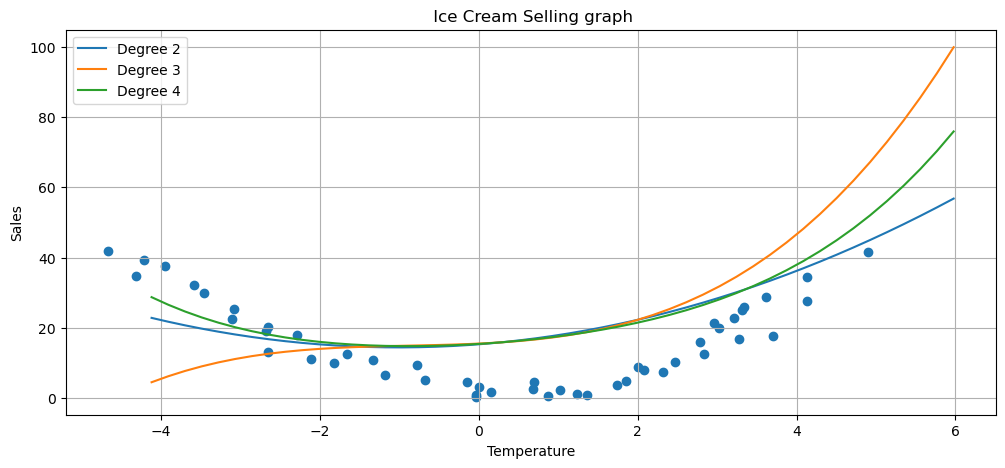

In [85]:
# https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression?resource=download
df = pd.read_csv('datasets/Ice_cream selling data.csv', sep=',')
X = df['Temperature (°C)'].values
y = df['Ice Cream Sales (units)'].values
normalized_X =(X - np.mean(X)) / np.std(X)
normalized_y = normalized_y = (y - np.mean(y)) / np.std(y)
polynomial_degree = [2,3,4]

plt.figure(figsize=(12, 5))
for degree in polynomial_degree:
    betas, error = learn_and_fit(normalized_X, normalized_y, degree)
    
    normalized_X_range = np.linspace(normalized_x.min(), normalized_y.max(), len(normalized_y))
    
    polynomial_X_range = np.array([transform_to_polynomial_feature(x, degree) for x in normalized_X_range])
    
    normalized_prediction = calculate_regression_function(polynomial_X_range, betas[-1])
    
    X_range = normalized_X_range * np.std(X) + np.mean(X)
    prediction = normalized_prediction * np.std(y) + np.mean(y)
    
    plt.plot(X_range, prediction, label=f'Degree {degree}')

plt.scatter(X,y)
plt.title(" Ice Cream Selling graph")
plt.xlabel('Temperature')
plt.ylabel('Sales')

plt.legend()

plt.grid(True)
plt.show()

### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse_normalized = mean_squared_error(normalized_y, normalized_prediction)
mse = mean_squared_error(y, prediction)


mae_normalized = mean_absolute_error(normalized_y, normalized_prediction)
mae = mean_absolute_error(y, prediction)


r2_normalized = r2_score(normalized_y, normalized_prediction)
r2 = r2_score(y, prediction)

print(f'Normalized MSE: {mse_normalized}, Normalized MAE: {mae_normalized}, Normalized R2 Score: {r2_normalized}')
print(f'MSE: {mse}, MAE: {mae}, R2 Score: {r2}')

Normalized MSE: 2.2510462870193635, Normalized MAE: 1.2789984480101226, Normalized R2 Score: -1.2510462870193635
MSE: 331.6974938670729, MAE: 15.52561812926649, R2 Score: -1.2510462870193635


Wyniki dla danych znormalizowanych są poprawne, dla danych nieznormalizowanych nieco odbiegają od normy :)